In [3]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords,wordnet
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer,PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns 


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os 

In [7]:
file=[]
for i in os.listdir(r'C:\Users\piyus\Downloads\archive\Trump_NLP'):
    file.append(open(r'C:\Users\piyus\Downloads\archive\Trump_NLP\\'+i,encoding="UTF-8").read())

In [10]:
full_file=' '.join(file)

In [11]:
import re
full_file=re.sub(r'[^A-Za-z]',' ',full_file)

In [12]:

stopw=stopwords.words('english')
# stopw.extend(['said', 'go', 'know', 'peopl', 'say', 'right', 'want', 'year', 'great', 'like', 'get', 'one', 'come', 'think',\
# 'time','thing','look','michigan','ever','see','never','got','job','back','take','lot','thank','deal',\
# 'well','guy','could','would','okay','tell','good','even','happen','two','much','give','way','oh',\
# 'talk','done','make,. big','best','call','mean','use','made','let','first,oh','sir','realli',\
# 'better','ago','littl','alway','everi,nobodi,tri','believ','long','pay','anyth','crazi','number',\
# 'bring','beauti','came','care','world','greatest,ast','need','four'])
stemp=PorterStemmer()
lam=WordNetLemmatizer()
def check(x):
    try:
        if nltk.pos_tag([x])[0][1]=='NN':
            return lam.lemmatize(x,'n')
        elif nltk.pos_tag([x])[0][1]=='JJ':
            return lam.lemmatize(x,wordnet.ADJ)
        else:
            return ''
    except:
        print(nltk.pos_tag([x]))
after_pre=' '.join(check(i) for i in nltk.word_tokenize(full_file.lower()) if i not in stopw)     

[('i', 'NN'), ('am', 'VBP'), ('not', 'RB'), ('most', 'RBS'), ('going', 'VBG')]

In [14]:
', '.join(i[0] for i in nltk.FreqDist(nltk.word_tokenize(after_pre)).most_common(100))

'great, right, want, think, thank, country, good, lot, america, time, american, president, way, new, much, look, love, many, thing, big, job, tell, guy, state, biden, world, china, last, nobody, okay, win, trump, year, history, deal, incredible, sir, bad, joe, little, left, oh, united, wall, party, money, election, put, call, beautiful, hell, vote, crazy, mean, day, true, anything, everything, military, work, everybody, fake, man, number, republican, news, democrat, place, nation, something, nothing, law, border, carolina, tough, thought, somebody, governor, family, today, end, care, obama, saw, washington, open, house, please, talk, anybody, half, hear, administration, help, record, heard, need, trade, mexico, pay'

In [28]:
', '.join(i[0].upper() for i in nltk.FreqDist(nltk.word_tokenize(after_pre)).most_common(30))

'GREAT, RIGHT, WANT, THINK, THANK, COUNTRY, GOOD, LOT, AMERICA, TIME, AMERICAN, PRESIDENT, WAY, NEW, MUCH, LOOK, LOVE, MANY, THING, BIG, JOB, TELL, GUY, STATE, BIDEN, WORLD, CHINA, LAST, NOBODY, OKAY'

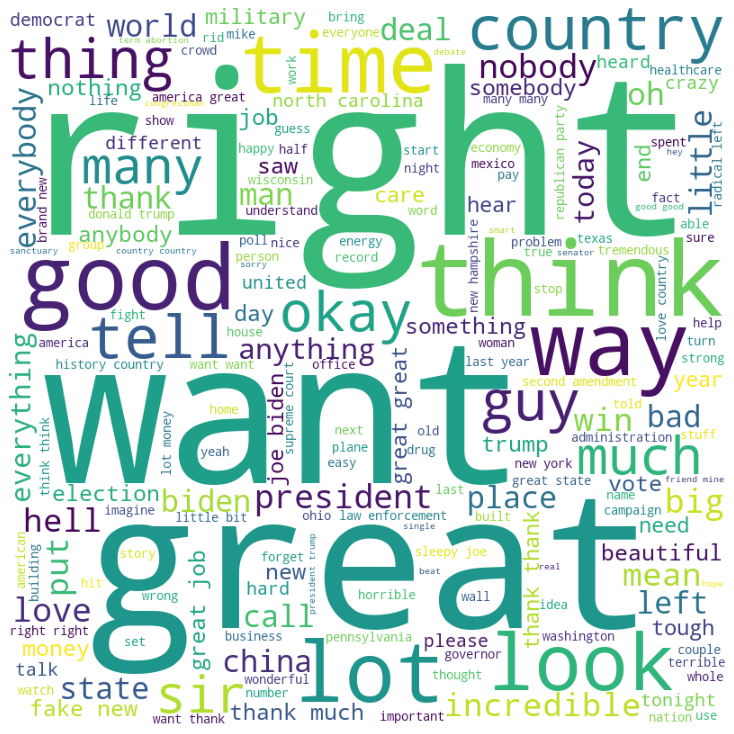

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(after_pre) 
import matplotlib.pyplot  as plt
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [16]:
', '.join((xp[0][0]+'_'+xp[0][1]).upper() for xp in nltk.FreqDist(list(filter(lambda x:x[0]!=x[1],nltk.bigrams(nltk.word_tokenize(after_pre))))).most_common(10))

'THANK_MUCH, GREAT_JOB, FAKE_NEWS, JOE_BIDEN, NORTH_CAROLINA, AMERICA_GREAT, NEW_YORK, HISTORY_COUNTRY, SLEEPY_JOE, GREAT_STATE'

In [17]:
', '.join((xp[0][0]+'_'+xp[0][1]+'_'+xp[0][2]).upper() for xp in nltk.FreqDist(list(filter(lambda x:x[0]!=x[1] and x[2]!=x[1] and x[0]!=x[2],nltk.trigrams(nltk.word_tokenize(after_pre))))).most_common(10))

'GREAT_AMERICAN_FLAG, LOVE_COUNTRY_HONOR, COUNTRY_HONOR_HISTORY, HELP_DEVOTION_DRIVE, AMERICA_GREAT_THANK, SLEEPY_JOE_BIDEN, WEALTHY_AMERICA_STRONG, SAFE_AMERICA_GREAT, MOVEMENT_FAMILY_GLORIOUS, FAMILY_GLORIOUS_NATION'

In [34]:
', '.join((xp[0][0]+'_'+xp[0][1]+'_'+xp[0][2]+'_'+xp[0][3]).upper() for xp in nltk.FreqDist(list(filter(lambda x:x[0]!=x[1] and x[0]!=x[2] and x[0]!=x[3] and x[1]!=x[2] and x[1]!=x[3] and x[2]!=x[3],nltk.ngrams(nltk.word_tokenize(after_pre),4)))).most_common(10))

'LOVE_COUNTRY_HONOR_HISTORY, MOVEMENT_FAMILY_GLORIOUS_NATION, FAMILY_GLORIOUS_NATION_GOD, SAFE_AMERICA_GREAT_THANK, DIGNITY_WORK_SANCTITY_LIFE, COUNTRY_HONOR_HISTORY_RESPECT, HONOR_HISTORY_RESPECT_GREAT, HISTORY_RESPECT_GREAT_AMERICAN, RESPECT_GREAT_AMERICAN_FLAG, GREAT_AMERICAN_FLAG_LIVE'

In [70]:
def print_ngram(ngram=2,show_top=10):
    print('Data Sel is N-Gram==>',ngram)
    print('>>'*20 +' Most Combined'+'>>'*20)
    data=[]
    count=-1
    for i in nltk.FreqDist(list(filter(lambda x:len(set(x))>ngram-1,nltk.ngrams(nltk.word_tokenize(after_pre),ngram)))).most_common(show_top):
        temp=[]
        for j in range(ngram):
            temp.append(i[0][j].upper())
        data.append('_'.join(temp))
    return ", ".join(data)

In [72]:
for i in range(1,10):
    print(print_ngram(ngram=i,show_top=10))
    print()

Data Sel is N-Gram==> 1
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Most Combined>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
GREAT, RIGHT, WANT, THINK, THANK, COUNTRY, GOOD, LOT, AMERICA, TIME

Data Sel is N-Gram==> 2
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Most Combined>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
THANK_MUCH, GREAT_JOB, FAKE_NEWS, JOE_BIDEN, NORTH_CAROLINA, AMERICA_GREAT, NEW_YORK, HISTORY_COUNTRY, SLEEPY_JOE, GREAT_STATE

Data Sel is N-Gram==> 3
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Most Combined>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
GREAT_AMERICAN_FLAG, LOVE_COUNTRY_HONOR, COUNTRY_HONOR_HISTORY, HELP_DEVOTION_DRIVE, AMERICA_GREAT_THANK, SLEEPY_JOE_BIDEN, WEALTHY_AMERICA_STRONG, SAFE_AMERICA_GREAT, MOVEMENT_FAMILY_GLORIOUS, FAMILY_GLORIOUS_NATION

Data Sel is N-Gram==> 4
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Most Combined>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
LOVE_COUNTRY_HONOR_HISTORY, MOVEMENT_FAMILY_GLORIOUS_NATION, FAMILY_GLORIOUS_NATION_GOD, SAFE_AMERICA_GREAT_T